# Data Wrangling Project

## Topic: Analyzing Social Determinants of Health - Age, Income, Crime w.r.t. Health Insurance

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #importing sns to plot regression line
from pandas_profiling import ProfileReport

### Importing the SDOH relative census data

In [3]:
Census = pd.read_excel("SDOH_2020_COUNTY_1_0.xlsx",sheet_name=1)

In [4]:
Census

,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND
0,2020,1001,1,Alabama,Autauga County,South,0,55639.0,54929.0,52404.0,...,0.0,0.00,0.0,0.0,1.0,0.02,52.63,36.84,10.53,0.0
1,2020,1003,1,Alabama,Baldwin County,South,0,218289.0,216518.0,206329.0,...,0.0,0.00,1.0,0.0,4.0,0.02,63.49,36.51,0.00,0.0
2,2020,1005,1,Alabama,Barbour County,South,0,25026.0,24792.0,23694.0,...,0.0,0.00,0.0,0.0,1.0,0.04,68.75,25.00,6.25,0.0
3,2020,1007,1,Alabama,Bibb County,South,0,22374.0,22073.0,21121.0,...,1.0,0.04,0.0,0.0,1.0,0.04,46.15,30.77,23.08,0.0
4,2020,1009,1,Alabama,Blount County,South,0,57755.0,57164.0,54250.0,...,0.0,0.00,0.0,0.0,1.0,0.02,60.00,40.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2020,72151,72,Puerto Rico,Yabucoa Municipio,NaN,1,32867.0,NaN,31669.0,...,0.0,0.00,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.0
3225,2020,72153,72,Puerto Rico,Yauco Municipio,NaN,1,34501.0,NaN,33194.0,...,0.0,0.00,0.0,0.0,1.0,0.03,66.67,33.33,0.00,0.0
3226,2020,78010,78,US Virgin Islands,St. Croix,NaN,1,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,1.0,0.00,57.14,42.86,0.00,0.0
3227,2020,78020,78,US Virgin Islands,St. John Island,NaN,1,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [16]:
#Listing down the columns to understand which columns will be relevant.
column_names = list(Census.columns.values)
for column_names in Census.columns:
    print(column_names)

YEAR
COUNTYFIPS
STATEFIPS
STATE
COUNTY
REGION
TERRITORY
ACS_TOT_POP_WT
ACS_TOT_POP_US_ABOVE1
ACS_TOT_POP_ABOVE5
ACS_TOT_POP_ABOVE15
ACS_TOT_POP_ABOVE16
ACS_TOT_POP_16_19
ACS_TOT_POP_ABOVE25
ACS_TOT_CIVIL_POP_ABOVE18
ACS_TOT_CIVIL_VET_POP_ABOVE25
ACS_TOT_OWN_CHILD_BELOW17
ACS_TOT_WORKER_NWFH
ACS_TOT_WORKER_HH
ACS_TOT_CIVILIAN_LABOR
ACS_TOT_CIVIL_EMPLOY_POP
ACS_TOT_POP_POV
ACS_TOT_CIVIL_NONINST_POP_POV
ACS_TOT_CIVIL_POP_POV
ACS_TOT_GRANDCHILDREN_GP
ACS_TOT_HU
ACS_TOT_HH
ACS_AVG_HH_SIZE
ACS_TOT_CIVIL_NONINST_POP
ACS_TOT_CIVIL_VET_POP
ACS_PCT_CHILD_DISAB
ACS_PCT_DISABLE
ACS_PCT_NONVET_DISABLE_18_64
ACS_PCT_VET_DISABLE_18_64
ACS_PCT_MALE
ACS_PCT_FEMALE
ACS_PCT_CTZ_US_BORN
ACS_PCT_CTZ_NONUS_BORN
ACS_PCT_FOREIGN_BORN
ACS_PCT_NON_CITIZEN
ACS_PCT_CTZ_NATURALIZED
ACS_PCT_CTZ_ABOVE18
ACS_PCT_NONCTN_1990
ACS_PCT_NONCTN_1999
ACS_PCT_NONCTN_2000
ACS_PCT_NONCTN_2010
ACS_PCT_API_LANG
ACS_PCT_ENGL_NOT_ALL
ACS_PCT_ENGL_NOT_WELL
ACS_PCT_ENGL_VERY_WELL
ACS_PCT_ENGL_WELL
ACS_PCT_ENGLISH
ACS_PCT_HH_LIMIT_EN

### Subsetting Massachusetts relative data

In [17]:
#For the purpose of our study the level of analysis is counties of Massachusetts, hence we
#have subsetted according to that.
Mass_Census = Census[Census['STATE'] == 'Massachusetts']

In [18]:
#Selecting the relative columns from the data and assigning it to the dataframe Mass_Census.
Mass_Census=pd.DataFrame(Mass_Census, columns = ['STATE','COUNTYFIPS','COUNTY','POS_TOT_NF',
                                       'POS_TOT_CMHC','POS_PCT_HOSP_GOV',
        'POS_PCT_HOSP_FOR_PROFIT','POS_MEAN_DIST_ED','NHC_FACS_RATE',
        'MP_MEDICARE_ELIGIBLES','LTC_AVG_OBS_REHOSP_RATE','HIFLD_UC',
        'CHR_TOT_POPULATION','CHR_TOT_MENTAL_PROV','CHR_MENTAL_PROV_RATE',
        'CDCW_TRANSPORT_DTH_RATE','CDCW_SELFHARM_DTH_RATE','CDCW_OPIOID_DTH_RATE',
        'CDCW_MATERNAL_DTH_RATE','CDCW_INJURY_DTH_RATE','CDCW_DRUG_DTH_RATE',
        'CDCW_ASSAULT_DTH_RATE','AMFAR_TOT_MHFAC','AMFAR_TOT_MEDSAFAC',
        'AMFAR_TOT_MEDMHFAC','AHRF_TOT_DENTISTS','ACS_TOT_POP_POV',
        'ACS_TOT_POP_ABOVE25','ACS_TOT_POP_ABOVE16','ACS_TOT_HU','ACS_TOT_HH',
        'ACS_TOT_CIVIL_POP_ABOVE18','ACS_TOT_CIVIL_EMPLOY_POP','ACS_PER_CAPITA_INC',
        'ACS_PCT_WHITE','ACS_PCT_UNINSURED_BELOW64','ACS_PCT_UNINSURED','ACS_PCT_UNEMPLOY',
        'ACS_PCT_PRIVATE_SELF','ACS_PCT_PRIVATE_MDCR','ACS_PCT_PRIVATE_EMPL',
        'ACS_PCT_PRIVATE_ANY','ACS_PCT_OTHER_INS','ACS_PCT_NHPI','ACS_PCT_MEDICARE_ONLY',
        'ACS_PCT_MEDICAID_ANY_BELOW64','ACS_PCT_MEDICAID_ANY','ACS_PCT_MALE',
        'ACS_PCT_INC50','ACS_PCT_HH_NO_INTERNET','ACS_PCT_HH_INTERNET',
        'ACS_PCT_HH_INC_99999','ACS_PCT_HH_INC_49999','ACS_PCT_HH_INC_24999',
        'ACS_PCT_HH_INC_14999','ACS_PCT_HH_INC_100000','ACS_PCT_HH_INC_10000',
        'ACS_PCT_GOVT','ACS_PCT_FEMALE','ACS_PCT_EMPLOYED','ACS_PCT_EDUC','ACS_PCT_DISABLE',
        'ACS_PCT_CHILD_DISAB','ACS_PCT_AGE_ABOVE80','ACS_PCT_AGE_ABOVE65',
        'ACS_PCT_AGE_50_64','ACS_PCT_AGE_5_9','ACS_PCT_AGE_45_64','ACS_PCT_AGE_30_44',
        'ACS_PCT_AGE_18_44','ACS_PCT_AGE_18_29','ACS_PCT_AGE_15_17','ACS_PCT_AGE_10_14',
        'ACS_PCT_AGE_0_4','ACS_PCT_AGE_0_17','ACS_MEDIAN_INC_M','ACS_MEDIAN_INC_F','ACS_MEDIAN_HH_INC',
        'ACS_MEDIAN_AGE_MALE','ACS_MEDIAN_AGE_FEMALE','ACS_MEDIAN_AGE'])

In [19]:
Mass_Census.head()

,STATE,COUNTYFIPS,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,MP_MEDICARE_ELIGIBLES,...,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,ACS_PCT_AGE_0_4,ACS_PCT_AGE_0_17,ACS_MEDIAN_INC_M,ACS_MEDIAN_INC_F,ACS_MEDIAN_HH_INC,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE
1219,Massachusetts,25001,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,76883.0,...,2.95,4.48,3.66,15.03,47850.0,31495.0,76863.0,51.2,55.4,53.7
1220,Massachusetts,25003,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,34789.0,...,3.34,5.03,4.18,16.91,40153.0,26942.0,62166.0,45.4,48.9,47.2
1221,Massachusetts,25005,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,121778.0,...,3.76,6.25,5.24,20.69,43496.0,27547.0,71450.0,39.3,42.8,41.0
1222,Massachusetts,25007,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,5011.0,...,3.20,5.73,3.57,16.79,44242.0,35179.0,77318.0,47.3,50.0,49.0
1223,Massachusetts,25009,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,160133.0,...,3.87,6.27,5.60,21.28,47914.0,30311.0,82225.0,39.1,42.5,40.9


### Data Formatting - SDOH Census Data

In [20]:
#Converting the CountyFIPS column to string in order to split it for future data merging.
Mass_Census['COUNTYFIPS']=Mass_Census['COUNTYFIPS'].astype(str)

In [21]:
#Splitting the countyfips to county code and state code.
Mass_Census1 = pd.DataFrame(Mass_Census.COUNTYFIPS.str.split('0',1).tolist(),
                           columns = ['State_code','County_code'])

In [22]:
Mass_Census1

,State_code,County_code
0,25,01
1,25,03
2,25,05
3,25,07
4,25,09
5,25,11
6,25,13
7,25,15
8,25,17
9,25,19


In [23]:
#Converting back from string to int after splitting
Mass_Census1['County_code']=Mass_Census1['County_code'].astype(int)


In [24]:
del Mass_Census1['State_code']


In [25]:
Mass_Census1


,County_code
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [26]:
CountyCode= [1,3,5,7,9,11,13,15,17,19,21,23,25,27]

In [27]:
CountyCode


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

In [28]:
#Adding CountyCode column to the original dataset.
Mass_Census['CountyCode'] = CountyCode


In [29]:
#Bringing the CountyCode column to the first column
first_column = Mass_Census.pop('CountyCode')
Mass_Census.insert(0,'CountyCode',first_column)

In [30]:
Mass_Census

,CountyCode,STATE,COUNTYFIPS,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,...,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,ACS_PCT_AGE_0_4,ACS_PCT_AGE_0_17,ACS_MEDIAN_INC_M,ACS_MEDIAN_INC_F,ACS_MEDIAN_HH_INC,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE
1219,1,Massachusetts,25001,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,...,2.95,4.48,3.66,15.03,47850.0,31495.0,76863.0,51.2,55.4,53.7
1220,3,Massachusetts,25003,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,...,3.34,5.03,4.18,16.91,40153.0,26942.0,62166.0,45.4,48.9,47.2
1221,5,Massachusetts,25005,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,...,3.76,6.25,5.24,20.69,43496.0,27547.0,71450.0,39.3,42.8,41.0
1222,7,Massachusetts,25007,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,...,3.20,5.73,3.57,16.79,44242.0,35179.0,77318.0,47.3,50.0,49.0
1223,9,Massachusetts,25009,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,...,3.87,6.27,5.60,21.28,47914.0,30311.0,82225.0,39.1,42.5,40.9
1224,11,Massachusetts,25011,Franklin County,8.0,0.0,3.23,77.42,4.64,5.67,...,3.31,5.31,4.21,17.34,38145.0,27821.0,61198.0,45.1,48.5,47.0
1225,13,Massachusetts,25013,Hampden County,45.0,3.0,2.35,61.50,2.58,6.43,...,3.95,6.11,5.48,21.53,36595.0,25046.0,57623.0,37.5,41.0,39.4
1226,15,Massachusetts,25015,Hampshire County,10.0,1.0,6.82,86.36,5.19,3.72,...,2.83,4.55,3.36,14.53,36116.0,22922.0,73518.0,35.8,37.3,36.6
1227,17,Massachusetts,25017,Middlesex County,163.0,4.0,2.53,67.15,2.19,4.86,...,3.48,5.61,5.33,19.80,59055.0,39264.0,106202.0,37.2,39.8,38.5
1228,19,Massachusetts,25019,Nantucket County,2.0,0.0,44.44,55.56,2.21,8.92,...,3.14,5.26,4.29,15.88,53801.0,35766.0,112306.0,39.3,44.6,41.7


In [31]:
#Dropping the COUNTYFIPS column from original dataset.
Mass_Census.drop(['COUNTYFIPS'], axis=1)


,CountyCode,STATE,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,MP_MEDICARE_ELIGIBLES,...,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,ACS_PCT_AGE_0_4,ACS_PCT_AGE_0_17,ACS_MEDIAN_INC_M,ACS_MEDIAN_INC_F,ACS_MEDIAN_HH_INC,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE
1219,1,Massachusetts,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,76883.0,...,2.95,4.48,3.66,15.03,47850.0,31495.0,76863.0,51.2,55.4,53.7
1220,3,Massachusetts,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,34789.0,...,3.34,5.03,4.18,16.91,40153.0,26942.0,62166.0,45.4,48.9,47.2
1221,5,Massachusetts,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,121778.0,...,3.76,6.25,5.24,20.69,43496.0,27547.0,71450.0,39.3,42.8,41.0
1222,7,Massachusetts,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,5011.0,...,3.20,5.73,3.57,16.79,44242.0,35179.0,77318.0,47.3,50.0,49.0
1223,9,Massachusetts,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,160133.0,...,3.87,6.27,5.60,21.28,47914.0,30311.0,82225.0,39.1,42.5,40.9
1224,11,Massachusetts,Franklin County,8.0,0.0,3.23,77.42,4.64,5.67,18724.0,...,3.31,5.31,4.21,17.34,38145.0,27821.0,61198.0,45.1,48.5,47.0
1225,13,Massachusetts,Hampden County,45.0,3.0,2.35,61.50,2.58,6.43,102715.0,...,3.95,6.11,5.48,21.53,36595.0,25046.0,57623.0,37.5,41.0,39.4
1226,15,Massachusetts,Hampshire County,10.0,1.0,6.82,86.36,5.19,3.72,34820.0,...,2.83,4.55,3.36,14.53,36116.0,22922.0,73518.0,35.8,37.3,36.6
1227,17,Massachusetts,Middlesex County,163.0,4.0,2.53,67.15,2.19,4.86,273025.0,...,3.48,5.61,5.33,19.80,59055.0,39264.0,106202.0,37.2,39.8,38.5
1228,19,Massachusetts,Nantucket County,2.0,0.0,44.44,55.56,2.21,8.92,1996.0,...,3.14,5.26,4.29,15.88,53801.0,35766.0,112306.0,39.3,44.6,41.7


In [32]:
Mass_Census = Mass_Census.drop(['COUNTYFIPS'], axis=1)


In [33]:
#Creating a new dataframe for analysis
Health_insurance = Mass_Census[['CountyCode',
 'ACS_PCT_UNINSURED']]
Health_insurance


,CountyCode,ACS_PCT_UNINSURED
1219,1,3.13
1220,3,2.57
1221,5,2.86
1222,7,5.60
1223,9,2.98
1224,11,2.38
1225,13,3.04
1226,15,2.42
1227,17,2.61
1228,19,5.90


In [34]:
#Converting CountyCode column to string for the pie chart.
Health_insurance['CountyCode']=Health_insurance['CountyCode'].astype(str)


/var/folders/m5/kr1lnggs2xx2vnkr6rb010qh0000gn/T/ipykernel_1344/1072909355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Health_insurance['CountyCode']=Health_insurance['CountyCode'].astype(str)


array([<AxesSubplot:ylabel='ACS_PCT_UNINSURED'>], dtype=object)

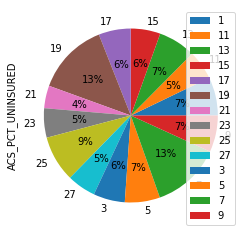

In [35]:
#creating a piechart
Health_insurance.groupby(['CountyCode']).mean().plot(kind='pie',subplots=True,autopct='%1.0f%%')

In [36]:
#Creating another dataframe 
Income_less_10000 = Mass_Census[['CountyCode',
 'ACS_PCT_HH_INC_10000']]
Income_less_10000


,CountyCode,ACS_PCT_HH_INC_10000
1219,1,3.54
1220,3,5.12
1221,5,5.19
1222,7,3.80
1223,9,4.97
1224,11,4.58
1225,13,7.23
1226,15,4.59
1227,17,3.81
1228,19,1.86


array([<AxesSubplot:ylabel='ACS_PCT_HH_INC_10000'>], dtype=object)

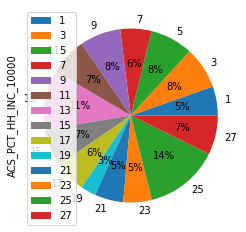

In [37]:
Income_less_10000.groupby(['CountyCode']).mean().plot(kind='pie',subplots=True,autopct='%1.0f%%')

In [38]:
ACS_PCT_MEDICAID_ANY = Mass_Census[['CountyCode',
 'ACS_PCT_MEDICAID_ANY']]
ACS_PCT_MEDICAID_ANY


,CountyCode,ACS_PCT_MEDICAID_ANY
1219,1,15.24
1220,3,19.65
1221,5,23.00
1222,7,17.79
1223,9,20.86
1224,11,20.43
1225,13,30.09
1226,15,12.52
1227,17,12.41
1228,19,12.63


array([<AxesSubplot:ylabel='ACS_PCT_MEDICAID_ANY'>], dtype=object)

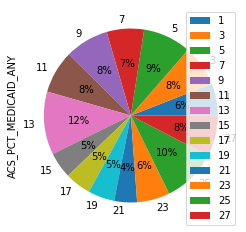

In [39]:
ACS_PCT_MEDICAID_ANY.groupby(['CountyCode']).mean().plot(kind='pie',subplots=True,autopct='%1.0f%%')

In [40]:
#We can infer that proportion of people with income less than 10000 in counties 13 and 25 is aligning with the proportion of provided medicaid in the same counties.

In [41]:
Medicaid_income = Mass_Census[['ACS_PCT_MEDICAID_ANY','ACS_PCT_HH_INC_10000']]
Medicaid_income


,ACS_PCT_MEDICAID_ANY,ACS_PCT_HH_INC_10000
1219,15.24,3.54
1220,19.65,5.12
1221,23.00,5.19
1222,17.79,3.80
1223,20.86,4.97
1224,20.43,4.58
1225,30.09,7.23
1226,12.52,4.59
1227,12.41,3.81
1228,12.63,1.86


In [42]:
Medicaid_income.corr()


,ACS_PCT_MEDICAID_ANY,ACS_PCT_HH_INC_10000
ACS_PCT_MEDICAID_ANY,1.000000,0.824786
ACS_PCT_HH_INC_10000,0.824786,1.000000


In [43]:
#This confirms there is a strong positive correlation between people less than 10000 income and people with medicaid insurance provided.

In [44]:
#income greater than 100000 and private insurance
Income_insurace = Mass_Census[['CountyCode','ACS_PCT_PRIVATE_ANY','ACS_PCT_HH_INC_100000']]
Income_insurace


,CountyCode,ACS_PCT_PRIVATE_ANY,ACS_PCT_HH_INC_100000
1219,1,62.64,38.02
1220,3,61.89,28.39
1221,5,61.73,34.73
1222,7,63.50,38.25
1223,9,65.06,41.51
1224,11,61.45,26.67
1225,13,54.96,27.57
1226,15,73.51,36.21
1227,17,75.12,52.89
1228,19,67.48,54.73


<AxesSubplot:xlabel='CountyCode'>

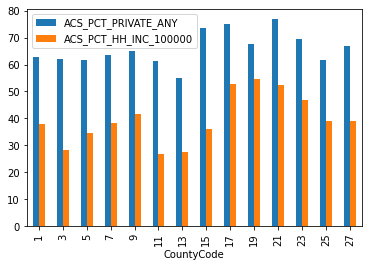

In [45]:
Income_insurace.plot(x="CountyCode", y=["ACS_PCT_PRIVATE_ANY", "ACS_PCT_HH_INC_100000"], kind="bar")

In [46]:
#Insurance companies need to focus on counties where people have income greater than 100000 
#but still not buying private health insurance.  


In [47]:
PerCapita = Mass_Census[['CountyCode','ACS_PER_CAPITA_INC']]
PerCapita


,CountyCode,ACS_PER_CAPITA_INC
1219,1,47315.0
1220,3,37025.0
1221,5,36900.0
1222,7,43994.0
1223,9,43948.0
1224,11,35919.0
1225,13,31483.0
1226,15,36600.0
1227,17,54433.0
1228,19,57246.0


<AxesSubplot:xlabel='CountyCode'>

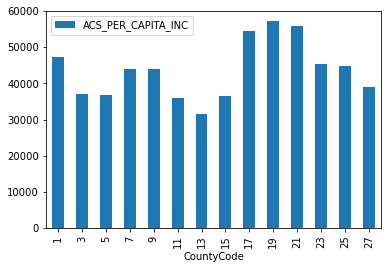

In [48]:
PerCapita.plot(kind="bar",x="CountyCode",y="ACS_PER_CAPITA_INC")


In [49]:
age_income = Mass_Census[['ACS_PCT_AGE_ABOVE80',
 'ACS_PCT_AGE_ABOVE65',
 'ACS_PCT_AGE_50_64',
 'ACS_PCT_AGE_5_9',
 'ACS_PCT_AGE_45_64',
 'ACS_PCT_AGE_30_44',
 'ACS_PCT_AGE_18_44',
 'ACS_PCT_AGE_18_29',
 'ACS_PCT_AGE_15_17',
 'ACS_PCT_AGE_10_14',
 'ACS_PCT_AGE_0_4',
 'ACS_PCT_AGE_0_17','ACS_PCT_UNINSURED']]


<AxesSubplot:xlabel='ACS_PCT_AGE_15_17', ylabel='ACS_PCT_UNINSURED'>

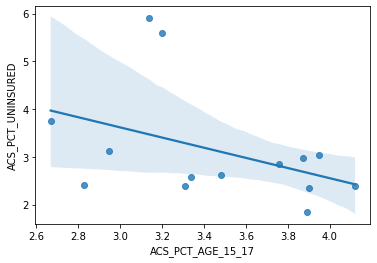

In [50]:
sns.regplot(data= age_income, x=age_income['ACS_PCT_AGE_15_17'], y=age_income['ACS_PCT_UNINSURED'])

In [51]:
#This regression line clearly shows that people with 15 and 17 are uninsured.


In [52]:
Mass_Census

,CountyCode,STATE,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,MP_MEDICARE_ELIGIBLES,...,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,ACS_PCT_AGE_0_4,ACS_PCT_AGE_0_17,ACS_MEDIAN_INC_M,ACS_MEDIAN_INC_F,ACS_MEDIAN_HH_INC,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE
1219,1,Massachusetts,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,76883.0,...,2.95,4.48,3.66,15.03,47850.0,31495.0,76863.0,51.2,55.4,53.7
1220,3,Massachusetts,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,34789.0,...,3.34,5.03,4.18,16.91,40153.0,26942.0,62166.0,45.4,48.9,47.2
1221,5,Massachusetts,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,121778.0,...,3.76,6.25,5.24,20.69,43496.0,27547.0,71450.0,39.3,42.8,41.0
1222,7,Massachusetts,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,5011.0,...,3.20,5.73,3.57,16.79,44242.0,35179.0,77318.0,47.3,50.0,49.0
1223,9,Massachusetts,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,160133.0,...,3.87,6.27,5.60,21.28,47914.0,30311.0,82225.0,39.1,42.5,40.9
1224,11,Massachusetts,Franklin County,8.0,0.0,3.23,77.42,4.64,5.67,18724.0,...,3.31,5.31,4.21,17.34,38145.0,27821.0,61198.0,45.1,48.5,47.0
1225,13,Massachusetts,Hampden County,45.0,3.0,2.35,61.50,2.58,6.43,102715.0,...,3.95,6.11,5.48,21.53,36595.0,25046.0,57623.0,37.5,41.0,39.4
1226,15,Massachusetts,Hampshire County,10.0,1.0,6.82,86.36,5.19,3.72,34820.0,...,2.83,4.55,3.36,14.53,36116.0,22922.0,73518.0,35.8,37.3,36.6
1227,17,Massachusetts,Middlesex County,163.0,4.0,2.53,67.15,2.19,4.86,273025.0,...,3.48,5.61,5.33,19.80,59055.0,39264.0,106202.0,37.2,39.8,38.5
1228,19,Massachusetts,Nantucket County,2.0,0.0,44.44,55.56,2.21,8.92,1996.0,...,3.14,5.26,4.29,15.88,53801.0,35766.0,112306.0,39.3,44.6,41.7


In [53]:
list(Mass_Census.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 9,
 0,
 1,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [54]:
#profile=ProfileReport(Mass_Census,title="SDOH Profile Report")
#profile.to_file("SDOH_profile_report.html")


### Importing the second dataset - Crime

In [55]:
Crime_Data = pd.read_csv('Crime Data.csv')

In [56]:
Crime_Data.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [57]:
column_names = list(Crime_Data.columns.values)
for column_names in Crime_Data.columns:
    print(column_names)

communityName
state
countyCode
communityCode
population
householdsize
racepctblack
racePctWhite
racePctAsian
racePctHisp
agePct12t21
agePct12t29
agePct16t24
agePct65up
numbUrban
pctUrban
medIncome
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
medFamInc
perCapInc
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
PctOccupMgmtProf
MalePctDivorce
MalePctNevMarr
FemalePctDiv
TotalPctDiv
PersPerFam
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMomYoungKids
PctWorkMom
NumKidsBornNeverMar
PctKidsBornNeverMar
NumImmig
PctImmigRecent
PctImmigRec5
PctImmigRec8
PctImmigRec10
PctRecentImmig
PctRecImmig5
PctRecImmig8
PctRecImmig10
PctSpeakEnglOnly
PctNotSpeakEnglWell
PctLargHouseFam
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
Hous

In [58]:
#We will consider the crime related columns in the data because the rest of the attributes are similar between the census
#data and crime data. We will also analyze the age groups vs. crime as a prerequisite.

#So the following columns are relevant- 

#communityName
#state
#countyCode
#communityCode
#population
#agePct12t21
#agePct12t29
#agePct16t24
#agePct65up
#murders
#murdPerPop
#rapes
#rapesPerPop
#robberies
#robbbPerPop
#assaults
#assaultPerPop
#burglaries
#burglPerPop
#larcenies
#larcPerPop
#autoTheft
#autoTheftPerPop
#arsons
#arsonsPerPop
#ViolentCrimesPerPop
#nonViolPerPop

#We are going to consider the data for Massachusetts county level, hence we will subset the data accoridng to the 'state'
#with keyword 'MA'.

In [59]:
Mass_Crime_Data = Crime_Data[Crime_Data['state'] == 'MA']

In [60]:
Mass_Crime_Data.head()


,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
6,Norwoodtown,MA,21.0,50250.0,28700,2.60,1.60,96.57,1.47,1.10,...,110.0,372.09,288.0,974.19,144.0,487.10,17.0,57.50,226.63,1890.88
56,Newtoncity,MA,17.0,45560.0,82585,2.80,2.08,92.78,4.55,1.98,...,479.0,558.12,1467.0,1709.31,248.0,288.96,0.0,0.00,256.34,2556.39
82,Hulltown,MA,23.0,31645.0,10466,2.76,0.89,98.10,0.64,1.08,...,105.0,943.57,101.0,907.62,18.0,161.75,3.0,26.96,889.65,2039.90
88,Barnstabletown,MA,1.0,3635.0,40949,2.47,2.70,94.53,0.70,1.71,...,609.0,1422.53,666.0,1555.67,128.0,298.99,0.0,0.00,1812.62,3277.20
129,Swanseatown,MA,5.0,68750.0,15411,2.93,0.34,98.90,0.43,0.59,...,20.0,123.12,231.0,1422.06,57.0,350.90,29.0,178.53,197.00,2074.61


In [61]:
Mass_Crime_Data = pd.DataFrame(Mass_Crime_Data, columns = ['communityName', 'state', 'countyCode' , 'communityCode', 
                                                           'population', 'agePct12t21', 'agePct12t29', 'agePct16t24', 
                                                           'agePct65up', 'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 
                                                           'robberies','robbbPerPop', 'assaults', 'assaultPerPop', 
                                                           'burglaries','burglPerPop', 'larcenies', 'larcPerPop', 
                                                           'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 
                                                           'ViolentCrimesPerPop', 'nonViolPerPop'])

In [62]:
Mass_Crime_Data

,communityName,state,countyCode,communityCode,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
6,Norwoodtown,MA,21.0,50250.0,28700,11.17,27.41,12.76,14.42,0,...,110.0,372.09,288.0,974.19,144.0,487.10,17.0,57.50,226.63,1890.88
56,Newtoncity,MA,17.0,45560.0,82585,14.34,28.52,15.99,12.95,1,...,479.0,558.12,1467.0,1709.31,248.0,288.96,0.0,0.00,256.34,2556.39
82,Hulltown,MA,23.0,31645.0,10466,12.65,27.85,12.66,9.99,0,...,105.0,943.57,101.0,907.62,18.0,161.75,3.0,26.96,889.65,2039.90
88,Barnstabletown,MA,1.0,3635.0,40949,10.80,21.74,10.33,18.13,2,...,609.0,1422.53,666.0,1555.67,128.0,298.99,0.0,0.00,1812.62,3277.20
129,Swanseatown,MA,5.0,68750.0,15411,15.41,25.59,13.55,12.51,0,...,20.0,123.12,231.0,1422.06,57.0,350.90,29.0,178.53,197.00,2074.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Marbleheadtown,MA,9.0,38400.0,19971,9.93,20.16,9.10,13.07,0,...,111.0,524.85,205.0,969.31,19.0,89.84,0.0,0.00,127.67,1584.00
2155,Dedhamtown,MA,21.0,16495.0,23782,12.12,25.77,12.84,14.26,2,...,75.0,306.15,497.0,2028.74,207.0,844.97,2.0,8.16,277.57,3188.02
2160,EastBridgewatertown,MA,23.0,18455.0,11104,15.30,27.76,13.70,8.84,0,...,81.0,685.98,212.0,1795.39,46.0,389.57,1.0,8.47,321.82,2879.40
2175,Wilmingtontown,MA,17.0,80230.0,17651,14.27,26.71,13.60,8.38,1,...,150.0,819.72,300.0,1639.43,84.0,459.04,6.0,32.79,426.25,2950.98


### Data Formatting - Crime Data

In [63]:
Mass_Crime_Data.dtypes

communityName           object
state                   object
countyCode             float64
communityCode          float64
population               int64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
murders                  int64
murdPerPop             float64
rapes                  float64
rapesPerPop            float64
robberies              float64
robbbPerPop            float64
assaults               float64
assaultPerPop          float64
burglaries             float64
burglPerPop            float64
larcenies              float64
larcPerPop             float64
autoTheft              float64
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object

In [64]:
Mass_Crime_Data = Mass_Crime_Data.astype({'communityName':'string', 'state':'string', 'countyCode':'int', 
                                          'communityCode':'int'})

In [65]:
#We can now format the Community name column removing the suffix for each and also sort the Mass level crime data by county
#code for further merging process. 
suffixes = ['town', 'city']
for suffix in suffixes:
    Mass_Crime_Data['communityName'] = Mass_Crime_Data['communityName'].str.replace(suffix,'County')
Mass_Crime_Data.head()

,communityName,state,countyCode,communityCode,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
6,NorwoodCounty,MA,21,50250,28700,11.17,27.41,12.76,14.42,0,...,110.0,372.09,288.0,974.19,144.0,487.10,17.0,57.50,226.63,1890.88
56,NewtonCounty,MA,17,45560,82585,14.34,28.52,15.99,12.95,1,...,479.0,558.12,1467.0,1709.31,248.0,288.96,0.0,0.00,256.34,2556.39
82,HullCounty,MA,23,31645,10466,12.65,27.85,12.66,9.99,0,...,105.0,943.57,101.0,907.62,18.0,161.75,3.0,26.96,889.65,2039.90
88,BarnstableCounty,MA,1,3635,40949,10.80,21.74,10.33,18.13,2,...,609.0,1422.53,666.0,1555.67,128.0,298.99,0.0,0.00,1812.62,3277.20
129,SwanseaCounty,MA,5,68750,15411,15.41,25.59,13.55,12.51,0,...,20.0,123.12,231.0,1422.06,57.0,350.90,29.0,178.53,197.00,2074.61


In [66]:
Mass_Crime_Data = Mass_Crime_Data.sort_values('countyCode')


In [67]:
#Before applying aggregate functions based on different columns we can drop the columns that do not make sense to 
#aggregate, these are communityName, state, communityCode.
Mass_Crime_Data = Mass_Crime_Data.drop(columns = ['state', 'communityCode'], axis = 1)

In [68]:
Mass_Crime_Data

,communityName,countyCode,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,murdPerPop,rapes,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1054,DennisCounty,1,13864,8.84,17.97,8.42,25.87,0,0.00,3.0,...,296.0,2013.61,387.0,2632.65,30.0,204.08,9.0,61.22,292.52,4911.56
88,BarnstableCounty,1,40949,10.80,21.74,10.33,18.13,2,4.67,22.0,...,609.0,1422.53,666.0,1555.67,128.0,298.99,0.0,0.00,1812.62,3277.20
1898,SandwichCounty,1,15489,12.41,21.36,9.61,12.82,0,0.00,2.0,...,98.0,596.69,232.0,1412.57,28.0,170.48,0.0,0.00,541.89,2179.74
715,YarmouthCounty,1,21174,9.31,18.83,9.04,27.51,0,0.00,9.0,...,280.0,1247.16,592.0,2636.85,56.0,249.43,7.0,31.18,445.41,4164.63
1198,HarwichCounty,1,10275,9.70,17.94,8.24,25.83,0,0.00,0.0,...,79.0,725.17,208.0,1909.31,8.0,73.43,1.0,9.18,358.00,2717.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,LeominsterCounty,27,38145,12.10,27.99,12.77,11.60,4,10.40,13.0,...,458.0,1191.22,1082.0,2814.19,145.0,377.13,3.0,7.80,408.34,4390.35
689,NorthbridgeCounty,27,13371,13.40,26.28,12.20,12.41,0,0.00,3.0,...,53.0,380.45,163.0,1170.05,12.0,86.14,0.0,0.00,674.75,1636.64
727,WorcesterCounty,27,169759,16.02,30.98,17.13,14.03,12,7.22,77.0,...,3404.0,2047.03,5221.0,3139.70,1692.0,1017.50,NaN,NaN,NaN,NaN
943,GraftonCounty,27,13035,13.82,27.46,13.19,10.93,0,0.00,1.0,...,34.0,250.37,60.0,441.83,8.0,58.91,0.0,0.00,368.19,751.10


### Row merging

In [69]:
#We will replace the 0's with Nan values in the rows to avoid incorrect calculation.
Mass_Crime_Data.replace(0, np.nan, inplace = True)


In [70]:
aggregate_application = {'countyCode':'first', 'population':'sum', 'agePct12t21': 'mean', 'agePct12t29': 'mean', 
                         'agePct16t24': 'mean','agePct65up':'mean', 'murders':'sum', 'murdPerPop':'sum', 'rapes':'sum', 
                         'rapesPerPop':'sum','robberies':'sum', 'robbbPerPop':'sum', 'assaults':'sum', 'assaultPerPop':'sum', 
                         'burglaries':'sum', 'burglPerPop':'sum', 'larcenies':'sum', 'larcPerPop':'sum', 
                         'autoTheft':'sum', 'autoTheftPerPop':'sum', 'arsons':'sum', 'arsonsPerPop':'sum', 
                         'ViolentCrimesPerPop':'sum', 'nonViolPerPop':'sum'}
Mass_Crime_Data = Mass_Crime_Data.groupby(Mass_Crime_Data['countyCode']).aggregate(aggregate_application)

In [71]:
Mass_Crime_Data = Mass_Crime_Data.drop(['countyCode'], axis = 1)


In [72]:
Mass_Crime_Data

,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,murdPerPop,rapes,rapesPerPop,robberies,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
countyCode,,,,,,,,,,,,,,,,,,,,,
1,117815,10.786667,20.661667,9.840000,20.605000,2.0,4.67,42.0,159.30,56.0,...,1574.0,7249.80,2539.0,12812.46,302.0,1301.70,18.0,107.45,3849.67,21471.44
3,65419,15.405000,28.530000,15.815000,15.230000,0.0,0.00,4.0,17.13,31.0,...,681.0,2105.03,1362.0,4655.30,146.0,398.33,0.0,0.00,1100.67,7158.64
5,350691,15.644444,27.465556,14.786667,12.706667,4.0,4.26,90.0,144.52,491.0,...,3537.0,6705.23,6262.0,15124.82,1155.0,2983.90,124.0,288.56,3881.85,20435.65
9,557058,12.461875,25.129375,12.110000,12.821250,14.0,22.38,149.0,328.14,976.0,...,6926.0,15646.60,10664.0,28892.50,4183.0,9185.59,119.0,219.10,8463.74,50559.83
11,18666,12.330000,24.460000,11.680000,15.810000,0.0,0.00,17.0,89.76,15.0,...,205.0,1082.37,517.0,2729.67,55.0,290.39,0.0,0.00,1678.99,4102.43
13,283181,13.974286,24.681429,12.748571,13.495714,21.0,16.88,157.0,234.99,727.0,...,4217.0,6779.59,10711.0,39563.04,4489.0,5591.58,58.0,279.83,2343.11,44602.25
15,27264,15.805000,27.525000,15.555000,11.700000,0.0,0.00,3.0,20.78,7.0,...,105.0,841.20,286.0,2026.58,49.0,314.78,1.0,9.16,578.89,3191.72
17,1174850,12.559706,26.943235,13.136471,11.220000,17.0,39.76,216.0,445.54,1039.0,...,8683.0,18891.46,21910.0,50785.25,7017.0,13121.73,235.0,356.38,12587.74,83154.84
21,530233,12.433158,25.665263,12.582105,12.025263,8.0,25.16,96.0,333.59,290.0,...,2848.0,8757.58,8005.0,24081.29,2719.0,7547.97,92.0,309.53,4364.10,40696.39


### Performing Correlation for Age and Crimes

In [73]:
#We can perform correlation between the columns to understand the strengths of the relationships between age and crimes.
corr_data = pd.DataFrame(Mass_Crime_Data, columns = ['agePct12t21', 'agePct12t29', 'agePct16t24','agePct65up', 'murders',
                                                     'rapes','robberies', 'assaults','burglaries','larcenies','autoTheft',
                                                     'arsons', 'ViolentCrimesPerPop','nonViolPerPop'])

In [74]:
corr_data.corr()

,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,ViolentCrimesPerPop,nonViolPerPop
agePct12t21,1.000000,0.677410,0.812449,-0.539313,0.222043,0.103281,0.205086,-0.012983,-0.093199,-0.011182,0.058251,-0.256100,-0.429275,-0.456350
agePct12t29,0.677410,1.000000,0.960324,-0.672820,0.785905,0.704909,0.787052,0.608464,0.417286,0.575078,0.661582,-0.139028,-0.138363,-0.305737
agePct16t24,0.812449,0.960324,1.000000,-0.582515,0.672096,0.551631,0.669721,0.450002,0.234726,0.410225,0.516572,-0.223835,-0.317402,-0.425644
agePct65up,-0.539313,-0.672820,-0.582515,1.000000,-0.450901,-0.489261,-0.444539,-0.441328,-0.492839,-0.513060,-0.509208,-0.219331,-0.230861,-0.151362
murders,0.222043,0.785905,0.672096,-0.450901,1.000000,0.947943,0.982943,0.778731,0.635178,0.790950,0.902463,-0.119388,-0.021458,-0.134260
rapes,0.103281,0.704909,0.551631,-0.489261,0.947943,1.000000,0.966097,0.879036,0.834036,0.927607,0.961817,0.158180,0.266424,0.157822
robberies,0.205086,0.787052,0.669721,-0.444539,0.982943,0.966097,1.000000,0.855722,0.712057,0.840744,0.930219,0.009829,0.071769,-0.055350
assaults,-0.012983,0.608464,0.450002,-0.441328,0.778731,0.879036,0.855722,1.000000,0.876316,0.926795,0.906278,0.447401,0.486199,0.314316
burglaries,-0.093199,0.417286,0.234726,-0.492839,0.635178,0.834036,0.712057,0.876316,1.000000,0.934152,0.847322,0.594573,0.718348,0.619385
larcenies,-0.011182,0.575078,0.410225,-0.513060,0.790950,0.927607,0.840744,0.926795,0.934152,1.000000,0.961548,0.480371,0.518316,0.469433


In [75]:
#We can see a few examples where the correlation between a certain age group and type of crime is high. 
#For example, for the percentage of people in the age group 12 to 29 the correlation between murder and the age group is 
#0.785905 which is approximately 79%. This is a strong indicator that murders have occured more in the percentage of
#population of the age group 12 to 29.

#Another example is the correlation between the percentage of people above the age of 65 and all the crimes. We can see 
#negative values for all of the crime which indicates a negative correlation meaning that there are less crimes in the 
#population of people who are 65 and above.

In [76]:
#profile=ProfileReport(Mass_Crime_Data,title="Crime Profile Report")
#profile.to_file("Crime_profile_report.html")


In [77]:
Mass_Crime_Data


,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,murdPerPop,rapes,rapesPerPop,robberies,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
countyCode,,,,,,,,,,,,,,,,,,,,,
1,117815,10.786667,20.661667,9.840000,20.605000,2.0,4.67,42.0,159.30,56.0,...,1574.0,7249.80,2539.0,12812.46,302.0,1301.70,18.0,107.45,3849.67,21471.44
3,65419,15.405000,28.530000,15.815000,15.230000,0.0,0.00,4.0,17.13,31.0,...,681.0,2105.03,1362.0,4655.30,146.0,398.33,0.0,0.00,1100.67,7158.64
5,350691,15.644444,27.465556,14.786667,12.706667,4.0,4.26,90.0,144.52,491.0,...,3537.0,6705.23,6262.0,15124.82,1155.0,2983.90,124.0,288.56,3881.85,20435.65
9,557058,12.461875,25.129375,12.110000,12.821250,14.0,22.38,149.0,328.14,976.0,...,6926.0,15646.60,10664.0,28892.50,4183.0,9185.59,119.0,219.10,8463.74,50559.83
11,18666,12.330000,24.460000,11.680000,15.810000,0.0,0.00,17.0,89.76,15.0,...,205.0,1082.37,517.0,2729.67,55.0,290.39,0.0,0.00,1678.99,4102.43
13,283181,13.974286,24.681429,12.748571,13.495714,21.0,16.88,157.0,234.99,727.0,...,4217.0,6779.59,10711.0,39563.04,4489.0,5591.58,58.0,279.83,2343.11,44602.25
15,27264,15.805000,27.525000,15.555000,11.700000,0.0,0.00,3.0,20.78,7.0,...,105.0,841.20,286.0,2026.58,49.0,314.78,1.0,9.16,578.89,3191.72
17,1174850,12.559706,26.943235,13.136471,11.220000,17.0,39.76,216.0,445.54,1039.0,...,8683.0,18891.46,21910.0,50785.25,7017.0,13121.73,235.0,356.38,12587.74,83154.84
21,530233,12.433158,25.665263,12.582105,12.025263,8.0,25.16,96.0,333.59,290.0,...,2848.0,8757.58,8005.0,24081.29,2719.0,7547.97,92.0,309.53,4364.10,40696.39


In [78]:
CountyCode= [1,3,5,9,11,13,15,17,21,23,25,27]
#Adding CountyCode column to the crime dataset.
Mass_Crime_Data['CountyCode'] = CountyCode


In [79]:
#Bringing the CountyCode column to the first column
first_column = Mass_Crime_Data.pop('CountyCode')
Mass_Crime_Data.insert(0,'CountyCode',first_column)


In [80]:
Mass_Crime_Data


,CountyCode,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,murders,murdPerPop,rapes,rapesPerPop,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
countyCode,,,,,,,,,,,,,,,,,,,,,
1,1,117815,10.786667,20.661667,9.840000,20.605000,2.0,4.67,42.0,159.30,...,1574.0,7249.80,2539.0,12812.46,302.0,1301.70,18.0,107.45,3849.67,21471.44
3,3,65419,15.405000,28.530000,15.815000,15.230000,0.0,0.00,4.0,17.13,...,681.0,2105.03,1362.0,4655.30,146.0,398.33,0.0,0.00,1100.67,7158.64
5,5,350691,15.644444,27.465556,14.786667,12.706667,4.0,4.26,90.0,144.52,...,3537.0,6705.23,6262.0,15124.82,1155.0,2983.90,124.0,288.56,3881.85,20435.65
9,9,557058,12.461875,25.129375,12.110000,12.821250,14.0,22.38,149.0,328.14,...,6926.0,15646.60,10664.0,28892.50,4183.0,9185.59,119.0,219.10,8463.74,50559.83
11,11,18666,12.330000,24.460000,11.680000,15.810000,0.0,0.00,17.0,89.76,...,205.0,1082.37,517.0,2729.67,55.0,290.39,0.0,0.00,1678.99,4102.43
13,13,283181,13.974286,24.681429,12.748571,13.495714,21.0,16.88,157.0,234.99,...,4217.0,6779.59,10711.0,39563.04,4489.0,5591.58,58.0,279.83,2343.11,44602.25
15,15,27264,15.805000,27.525000,15.555000,11.700000,0.0,0.00,3.0,20.78,...,105.0,841.20,286.0,2026.58,49.0,314.78,1.0,9.16,578.89,3191.72
17,17,1174850,12.559706,26.943235,13.136471,11.220000,17.0,39.76,216.0,445.54,...,8683.0,18891.46,21910.0,50785.25,7017.0,13121.73,235.0,356.38,12587.74,83154.84
21,21,530233,12.433158,25.665263,12.582105,12.025263,8.0,25.16,96.0,333.59,...,2848.0,8757.58,8005.0,24081.29,2719.0,7547.97,92.0,309.53,4364.10,40696.39


### Merging the SDOH Census and Crime Data using Outer Merge

In [81]:
SDOH_data = pd.merge(Mass_Census,Mass_Crime_Data, on = "CountyCode" , how='outer')


In [82]:
SDOH_data

,CountyCode,STATE,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,MP_MEDICARE_ELIGIBLES,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1,Massachusetts,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,76883.0,...,1574.0,7249.80,2539.0,12812.46,302.0,1301.70,18.0,107.45,3849.67,21471.44
1,3,Massachusetts,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,34789.0,...,681.0,2105.03,1362.0,4655.30,146.0,398.33,0.0,0.00,1100.67,7158.64
2,5,Massachusetts,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,121778.0,...,3537.0,6705.23,6262.0,15124.82,1155.0,2983.90,124.0,288.56,3881.85,20435.65
3,7,Massachusetts,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,5011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,Massachusetts,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,160133.0,...,6926.0,15646.60,10664.0,28892.50,4183.0,9185.59,119.0,219.10,8463.74,50559.83
5,11,Massachusetts,Franklin County,8.0,0.0,3.23,77.42,4.64,5.67,18724.0,...,205.0,1082.37,517.0,2729.67,55.0,290.39,0.0,0.00,1678.99,4102.43
6,13,Massachusetts,Hampden County,45.0,3.0,2.35,61.50,2.58,6.43,102715.0,...,4217.0,6779.59,10711.0,39563.04,4489.0,5591.58,58.0,279.83,2343.11,44602.25
7,15,Massachusetts,Hampshire County,10.0,1.0,6.82,86.36,5.19,3.72,34820.0,...,105.0,841.20,286.0,2026.58,49.0,314.78,1.0,9.16,578.89,3191.72
8,17,Massachusetts,Middlesex County,163.0,4.0,2.53,67.15,2.19,4.86,273025.0,...,8683.0,18891.46,21910.0,50785.25,7017.0,13121.73,235.0,356.38,12587.74,83154.84
9,19,Massachusetts,Nantucket County,2.0,0.0,44.44,55.56,2.21,8.92,1996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#We dropped the common columns of age to avoid any repetitive columns.
SDOH_data = SDOH_data.drop(columns = ['agePct12t21', 'agePct12t29', 'agePct16t24','agePct65up'], axis = 1)

In [84]:
corr_data1 = pd.DataFrame(SDOH_data, columns = ['ACS_PCT_AGE_ABOVE80','ACS_PCT_AGE_ABOVE65'
,'ACS_PCT_AGE_50_64','ACS_PCT_AGE_5_9','ACS_PCT_AGE_45_64','ACS_PCT_AGE_30_44',
'ACS_PCT_AGE_18_44','ACS_PCT_AGE_18_29','ACS_PCT_AGE_15_17','ACS_PCT_AGE_10_14',
'ACS_PCT_AGE_0_4','ACS_PCT_AGE_0_17','murders','rapes','robberies', 'assaults',
'burglaries','larcenies','autoTheft','arsons', 'ViolentCrimesPerPop','nonViolPerPop'])


In [85]:
corr_data1

,ACS_PCT_AGE_ABOVE80,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_50_64,ACS_PCT_AGE_5_9,ACS_PCT_AGE_45_64,ACS_PCT_AGE_30_44,ACS_PCT_AGE_18_44,ACS_PCT_AGE_18_29,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,...,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,ViolentCrimesPerPop,nonViolPerPop
0,7.99,30.48,24.41,3.95,29.69,13.22,24.80,11.58,2.95,4.48,...,2.0,42.0,56.0,1015.0,1574.0,2539.0,302.0,18.0,3849.67,21471.44
1,6.17,23.25,23.45,4.36,29.27,15.79,30.58,14.79,3.34,5.03,...,0.0,4.0,31.0,301.0,681.0,1362.0,146.0,0.0,1100.67,7158.64
2,4.48,16.95,21.39,5.44,28.21,18.61,34.14,15.53,3.76,6.25,...,4.0,90.0,491.0,1928.0,3537.0,6262.0,1155.0,124.0,3881.85,20435.65
3,4.91,24.48,24.59,4.28,30.33,16.59,28.41,11.82,3.20,5.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.60,17.10,21.51,5.54,28.02,18.22,33.60,15.38,3.87,6.27,...,14.0,149.0,976.0,3026.0,6926.0,10664.0,4183.0,119.0,8463.74,50559.83
5,4.77,21.98,24.06,4.50,30.26,17.68,30.42,12.74,3.31,5.31,...,0.0,17.0,15.0,286.0,205.0,517.0,55.0,0.0,1678.99,4102.43
6,4.44,16.91,20.32,5.98,26.46,18.03,35.10,17.07,3.95,6.11,...,21.0,157.0,727.0,556.0,4217.0,10711.0,4489.0,58.0,2343.11,44602.25
7,3.95,17.27,19.17,3.78,24.52,14.78,43.69,28.91,2.83,4.55,...,0.0,3.0,7.0,66.0,105.0,286.0,49.0,1.0,578.89,3191.72
8,4.07,15.29,19.86,5.38,26.40,20.88,38.52,17.63,3.48,5.61,...,17.0,216.0,1039.0,4894.0,8683.0,21910.0,7017.0,235.0,12587.74,83154.84
9,3.92,16.08,23.22,3.19,30.26,24.50,37.77,13.27,3.14,5.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
corr_data1.corr()

,ACS_PCT_AGE_ABOVE80,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_50_64,ACS_PCT_AGE_5_9,ACS_PCT_AGE_45_64,ACS_PCT_AGE_30_44,ACS_PCT_AGE_18_44,ACS_PCT_AGE_18_29,ACS_PCT_AGE_15_17,ACS_PCT_AGE_10_14,...,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,ViolentCrimesPerPop,nonViolPerPop
ACS_PCT_AGE_ABOVE80,1.000000,0.916146,0.643525,-0.206797,0.506162,-0.687743,-0.755147,-0.527531,-0.129197,-0.262269,...,-0.516303,-0.556602,-0.522176,-0.444299,-0.492097,-0.534627,-0.551499,-0.161011,-0.155683,-0.084488
ACS_PCT_AGE_ABOVE65,0.916146,1.000000,0.776351,-0.326392,0.615439,-0.741505,-0.810302,-0.563981,-0.215922,-0.278765,...,-0.567844,-0.655223,-0.596356,-0.552827,-0.641131,-0.668104,-0.659297,-0.314821,-0.264795,-0.239289
ACS_PCT_AGE_50_64,0.643525,0.776351,1.000000,-0.175546,0.970350,-0.445153,-0.912624,-0.868550,0.166499,0.170482,...,-0.773420,-0.780869,-0.794443,-0.671788,-0.591641,-0.738541,-0.802280,-0.149538,-0.033287,-0.050158
ACS_PCT_AGE_5_9,-0.206797,-0.326392,-0.175546,1.000000,-0.045867,-0.044665,-0.135065,-0.141227,0.875972,0.815145,...,-0.047687,0.145529,-0.043050,0.075107,0.449861,0.279246,0.158276,0.505043,0.518331,0.633610
ACS_PCT_AGE_45_64,0.506162,0.615439,0.970350,-0.045867,1.000000,-0.299556,-0.878302,-0.912985,0.335999,0.350969,...,-0.769672,-0.732612,-0.783547,-0.619211,-0.480174,-0.660553,-0.756821,-0.020119,0.098230,0.071739
ACS_PCT_AGE_30_44,-0.687743,-0.741505,-0.445153,-0.044665,-0.299556,1.000000,0.607815,0.157422,-0.038207,0.088288,...,0.750033,0.851806,0.795057,0.803624,0.782001,0.868670,0.855769,0.381478,0.344722,0.276244
ACS_PCT_AGE_18_44,-0.755147,-0.810302,-0.912624,-0.135065,-0.878302,0.607815,1.000000,0.879861,-0.361013,-0.309809,...,0.720205,0.694335,0.741239,0.598621,0.466173,0.628485,0.704788,0.036728,-0.052458,-0.093041
ACS_PCT_AGE_18_29,-0.527531,-0.563981,-0.868550,-0.141227,-0.912985,0.157422,0.879861,1.000000,-0.425995,-0.438023,...,0.518249,0.433748,0.521513,0.338369,0.183603,0.342543,0.444756,-0.149327,-0.242252,-0.257964
ACS_PCT_AGE_15_17,-0.129197,-0.215922,0.166499,0.875972,0.335999,-0.038207,-0.361013,-0.425995,1.000000,0.944483,...,-0.328485,-0.180132,-0.340970,-0.222876,0.149676,-0.060398,-0.173994,0.352556,0.393462,0.495679
ACS_PCT_AGE_10_14,-0.262269,-0.278765,0.170482,0.815145,0.350969,0.088288,-0.309809,-0.438023,0.944483,1.000000,...,-0.256607,-0.083205,-0.242482,-0.104297,0.251447,0.034830,-0.087633,0.445395,0.449816,0.517460


In [87]:
#With the merged data there is a high correlation between the crimes and the specific age
#group of 30 to 44.

In [88]:
corr_data2 = pd.DataFrame(SDOH_data, columns = ['ACS_PCT_HH_INC_10000',
'ACS_PCT_HH_INC_14999',
'ACS_PCT_HH_INC_24999',
'ACS_PCT_HH_INC_49999',
'ACS_PCT_HH_INC_99999','ACS_PCT_HH_INC_100000','murders','rapes','robberies','assaults',
'burglaries','larcenies','autoTheft','arsons', 'ViolentCrimesPerPop','nonViolPerPop'])

In [92]:
corr_data2.corr()

,ACS_PCT_HH_INC_10000,ACS_PCT_HH_INC_14999,ACS_PCT_HH_INC_24999,ACS_PCT_HH_INC_49999,ACS_PCT_HH_INC_99999,ACS_PCT_HH_INC_100000,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,ViolentCrimesPerPop,nonViolPerPop
ACS_PCT_HH_INC_10000,1.000000,0.898763,0.606259,0.263669,0.002365,-0.543495,0.784587,0.703660,0.780818,0.436918,0.372838,0.513904,0.659353,-0.237581,-0.333649,-0.272746
ACS_PCT_HH_INC_14999,0.898763,1.000000,0.749460,0.399484,0.093583,-0.648029,0.533006,0.459209,0.541239,0.190788,0.202681,0.266503,0.404234,-0.256922,-0.390685,-0.306619
ACS_PCT_HH_INC_24999,0.606259,0.749460,1.000000,0.860044,0.652931,-0.959631,-0.085409,-0.212249,-0.089426,-0.392481,-0.425784,-0.365619,-0.260952,-0.448891,-0.628553,-0.522604
ACS_PCT_HH_INC_49999,0.263669,0.399484,0.860044,1.000000,0.870959,-0.936990,-0.342879,-0.475096,-0.379253,-0.649842,-0.624321,-0.622422,-0.540730,-0.563822,-0.604079,-0.505070
ACS_PCT_HH_INC_99999,0.002365,0.093583,0.652931,0.870959,1.000000,-0.796411,-0.566331,-0.695655,-0.596792,-0.749491,-0.772313,-0.814052,-0.764721,-0.535510,-0.531655,-0.515484
ACS_PCT_HH_INC_100000,-0.543495,-0.648029,-0.959631,-0.936990,-0.796411,1.000000,0.123249,0.267234,0.147925,0.473306,0.487888,0.454019,0.340366,0.562836,0.648758,0.561028
murders,0.784587,0.533006,-0.085409,-0.342879,-0.566331,0.123249,1.000000,0.947943,0.982943,0.778731,0.635178,0.790950,0.902463,-0.119388,-0.021458,-0.134260
rapes,0.703660,0.459209,-0.212249,-0.475096,-0.695655,0.267234,0.947943,1.000000,0.966097,0.879036,0.834036,0.927607,0.961817,0.158180,0.266424,0.157822
robberies,0.780818,0.541239,-0.089426,-0.379253,-0.596792,0.147925,0.982943,0.966097,1.000000,0.855722,0.712057,0.840744,0.930219,0.009829,0.071769,-0.055350
assaults,0.436918,0.190788,-0.392481,-0.649842,-0.749491,0.473306,0.778731,0.879036,0.855722,1.000000,0.876316,0.926795,0.906278,0.447401,0.486199,0.314316


### Output Final data into csv file

In [89]:
#SDOH_data.to_csv('SDOH_Crime_Data.csv', index = False)

In [90]:
SDOH_data

,CountyCode,STATE,COUNTY,POS_TOT_NF,POS_TOT_CMHC,POS_PCT_HOSP_GOV,POS_PCT_HOSP_FOR_PROFIT,POS_MEAN_DIST_ED,NHC_FACS_RATE,MP_MEDICARE_ELIGIBLES,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1,Massachusetts,Barnstable County,25.0,2.0,5.41,71.17,8.74,7.49,76883.0,...,1574.0,7249.80,2539.0,12812.46,302.0,1301.70,18.0,107.45,3849.67,21471.44
1,3,Massachusetts,Berkshire County,22.0,0.0,1.23,81.48,4.69,11.91,34789.0,...,681.0,2105.03,1362.0,4655.30,146.0,398.33,0.0,0.00,1100.67,7158.64
2,5,Massachusetts,Bristol County,62.0,5.0,4.76,68.10,2.60,5.50,121778.0,...,3537.0,6705.23,6262.0,15124.82,1155.0,2983.90,124.0,288.56,3881.85,20435.65
3,7,Massachusetts,Dukes County,2.0,0.0,0.00,70.00,5.41,5.74,5011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,Massachusetts,Essex County,96.0,5.0,4.14,65.47,2.18,6.23,160133.0,...,6926.0,15646.60,10664.0,28892.50,4183.0,9185.59,119.0,219.10,8463.74,50559.83
5,11,Massachusetts,Franklin County,8.0,0.0,3.23,77.42,4.64,5.67,18724.0,...,205.0,1082.37,517.0,2729.67,55.0,290.39,0.0,0.00,1678.99,4102.43
6,13,Massachusetts,Hampden County,45.0,3.0,2.35,61.50,2.58,6.43,102715.0,...,4217.0,6779.59,10711.0,39563.04,4489.0,5591.58,58.0,279.83,2343.11,44602.25
7,15,Massachusetts,Hampshire County,10.0,1.0,6.82,86.36,5.19,3.72,34820.0,...,105.0,841.20,286.0,2026.58,49.0,314.78,1.0,9.16,578.89,3191.72
8,17,Massachusetts,Middlesex County,163.0,4.0,2.53,67.15,2.19,4.86,273025.0,...,8683.0,18891.46,21910.0,50785.25,7017.0,13121.73,235.0,356.38,12587.74,83154.84
9,19,Massachusetts,Nantucket County,2.0,0.0,44.44,55.56,2.21,8.92,1996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
Mass_Crime_Data.dtypes

CountyCode               int64
population               int64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
murders                float64
murdPerPop             float64
rapes                  float64
rapesPerPop            float64
robberies              float64
robbbPerPop            float64
assaults               float64
assaultPerPop          float64
burglaries             float64
burglPerPop            float64
larcenies              float64
larcPerPop             float64
autoTheft              float64
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object